# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [25]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [26]:
# Создадим функцию, которая возвращает матрицу А

import numpy as np

def design_matrix(x, m):
    A = np.zeros((len(x), m+1)) # Заготовка для матрицы
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(A)[1]):
            A[i][j] =(x[i])**(j)
    return(A)



# Теперь запишем систему уравнений в явном виде
def design(x, m):
# Задаём число параметров в задаче (m)
    A = design_matrix(x, m)

# Тогда в явном виде уравнения выглядят так A.T @ A @ betta = A.T @ y, где betta - вектор параметров (искомых коэффициентов)
# Решим эту систему уравнений с помощью библиотечных функцй. Перепишем систему в виде a @ betta = b, где
    a = A.T @ A
    b = A.T @ y
    betta = np.linalg.solve (a, b)
    return(betta)
print(design(x,4))



[ 0.51184244 -0.33857023 -2.05689291  1.08931365 -0.01872316]


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

[7.026918333333334, 4.153534808925792, 2.2781822120378084, 0.01151159916898308, 0.011422040284884126, 0.0114545993457551, 0.010431732330545933, 0.010923592672388203, 0.010123200084140761, 0.011083753013031635, 0.011881599660327818, 0.004303526168000213, 0.005346788017600478, 0.006698989350970076, 0.01000197327490615]


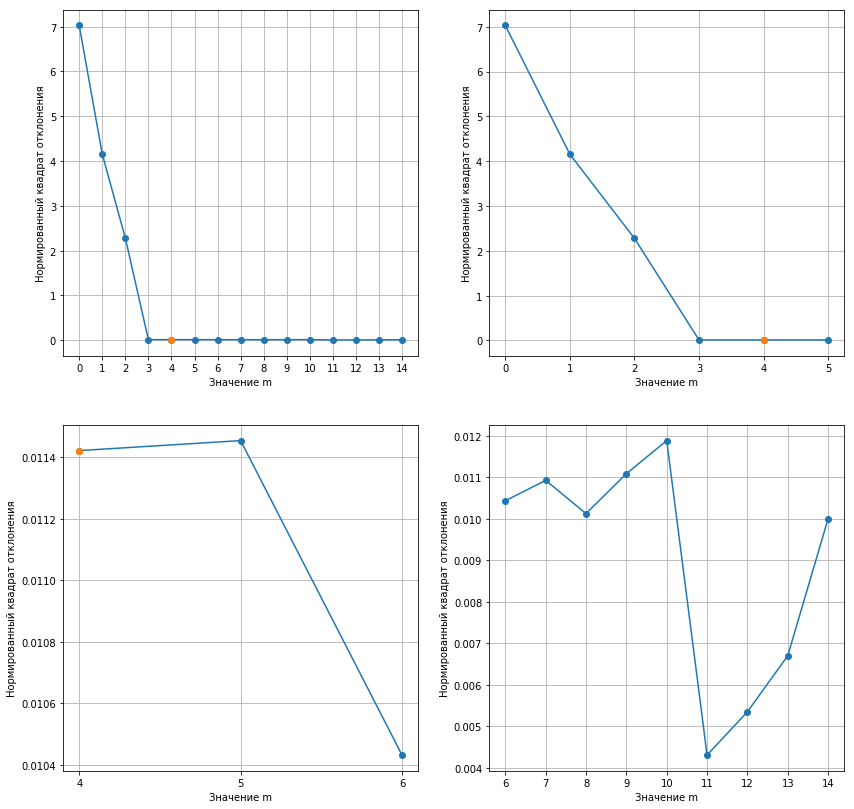

In [27]:
M= len(x)
n = len(x)+1
sigma =[]
for m in range(M):
    s = 0
    for k in range(len(x)):
        s += (np.polyval(design(x, m)[::-1], x[k]) - y[k])**2
    sigma.append(s/(n-m))
print(sigma)

import matplotlib.pyplot as plt
xx = [i for i in range(0, M)]

plt.figure(figsize=(14, 14)) # Размер картинки



plt.subplot(221) # Сетка для графиков и их расположение на ней
plt.plot(xx, sigma, 'o-')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
plt.plot(4, sigma[4], 'o')
plt.xlabel('Значение m')
plt.ylabel('Нормированный квадрат отклонения')
plt.grid()


plt.subplot(222) # Сетка для графиков и их расположение на ней
plt.plot(xx[:6], sigma[:6], 'o-')
plt.xticks([0, 1, 2, 3, 4, 5])
plt.plot(4, sigma[4], 'o')
plt.xlabel('Значение m')
plt.ylabel('Нормированный квадрат отклонения')
plt.grid()

plt.subplot(223) # Сетка для графиков и их расположение на ней
plt.plot(xx[4:7], sigma[4:7], 'o-')
plt.xticks([3, 4, 5, 6])
plt.plot(4, sigma[4], 'o')
plt.xlabel('Значение m')
plt.ylabel('Нормированный квадрат отклонения')
plt.grid()

plt.subplot(224) # Сетка для графиков и их расположение на ней
plt.plot(xx[6:], sigma[6:], 'o-')
plt.xticks([6, 7, 8, 9, 10, 11, 12, 13, 14])

plt.xlabel('Значение m')
plt.ylabel('Нормированный квадрат отклонения')
plt.grid()

Таким образом, выбираем m = 4.

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

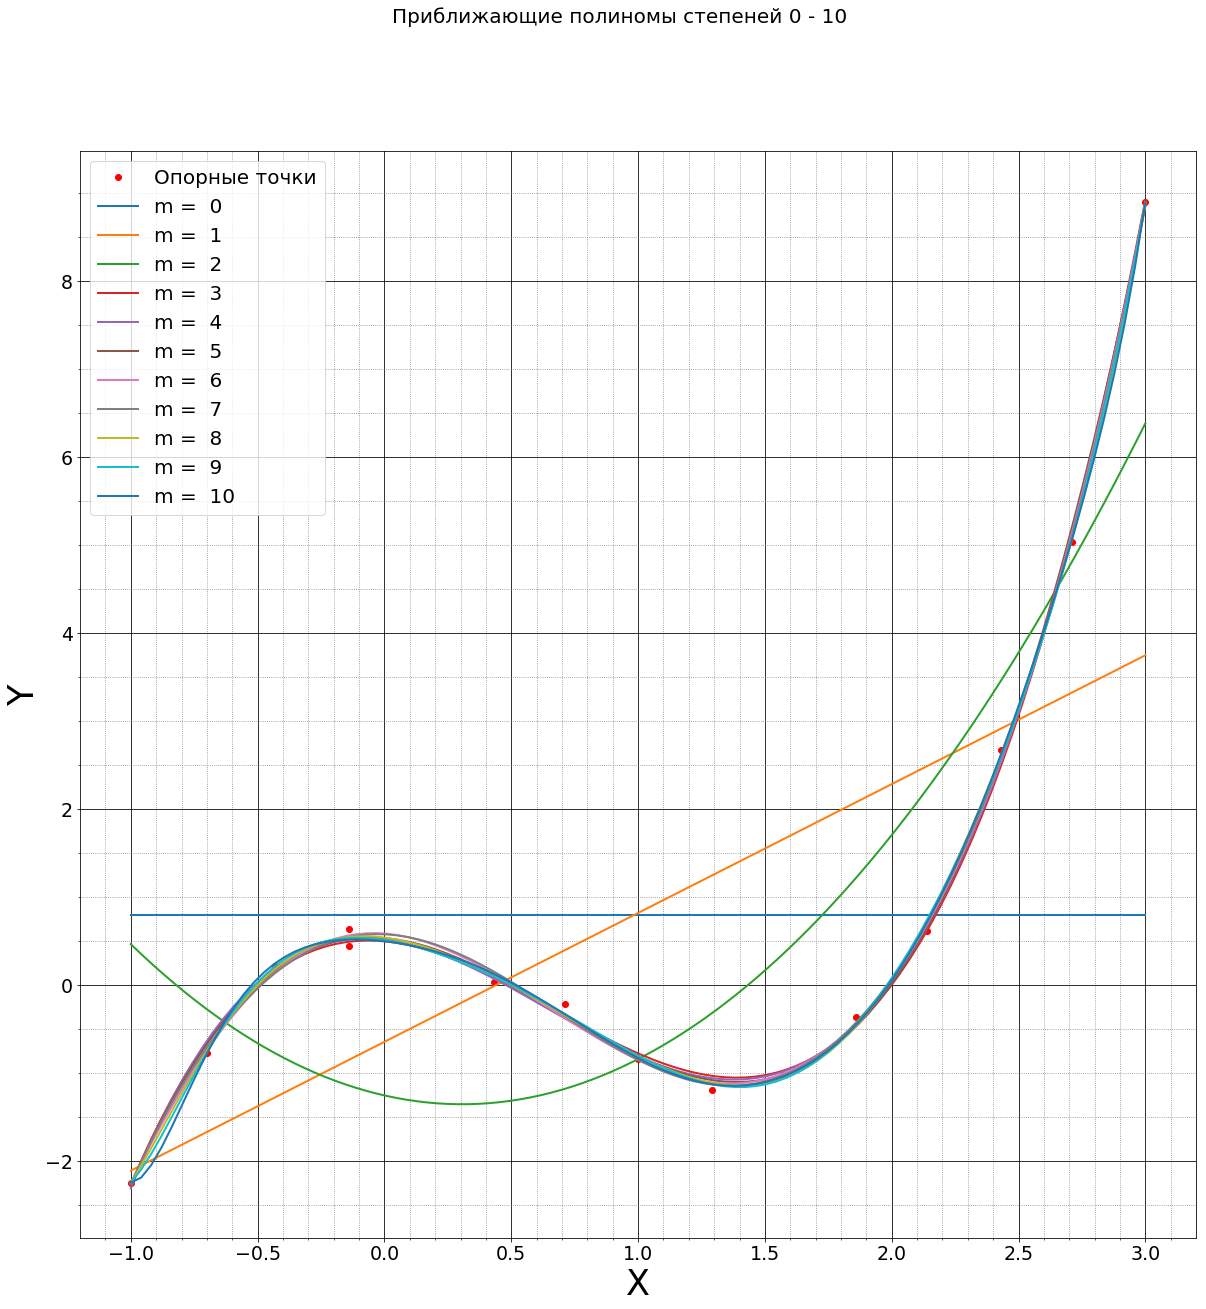

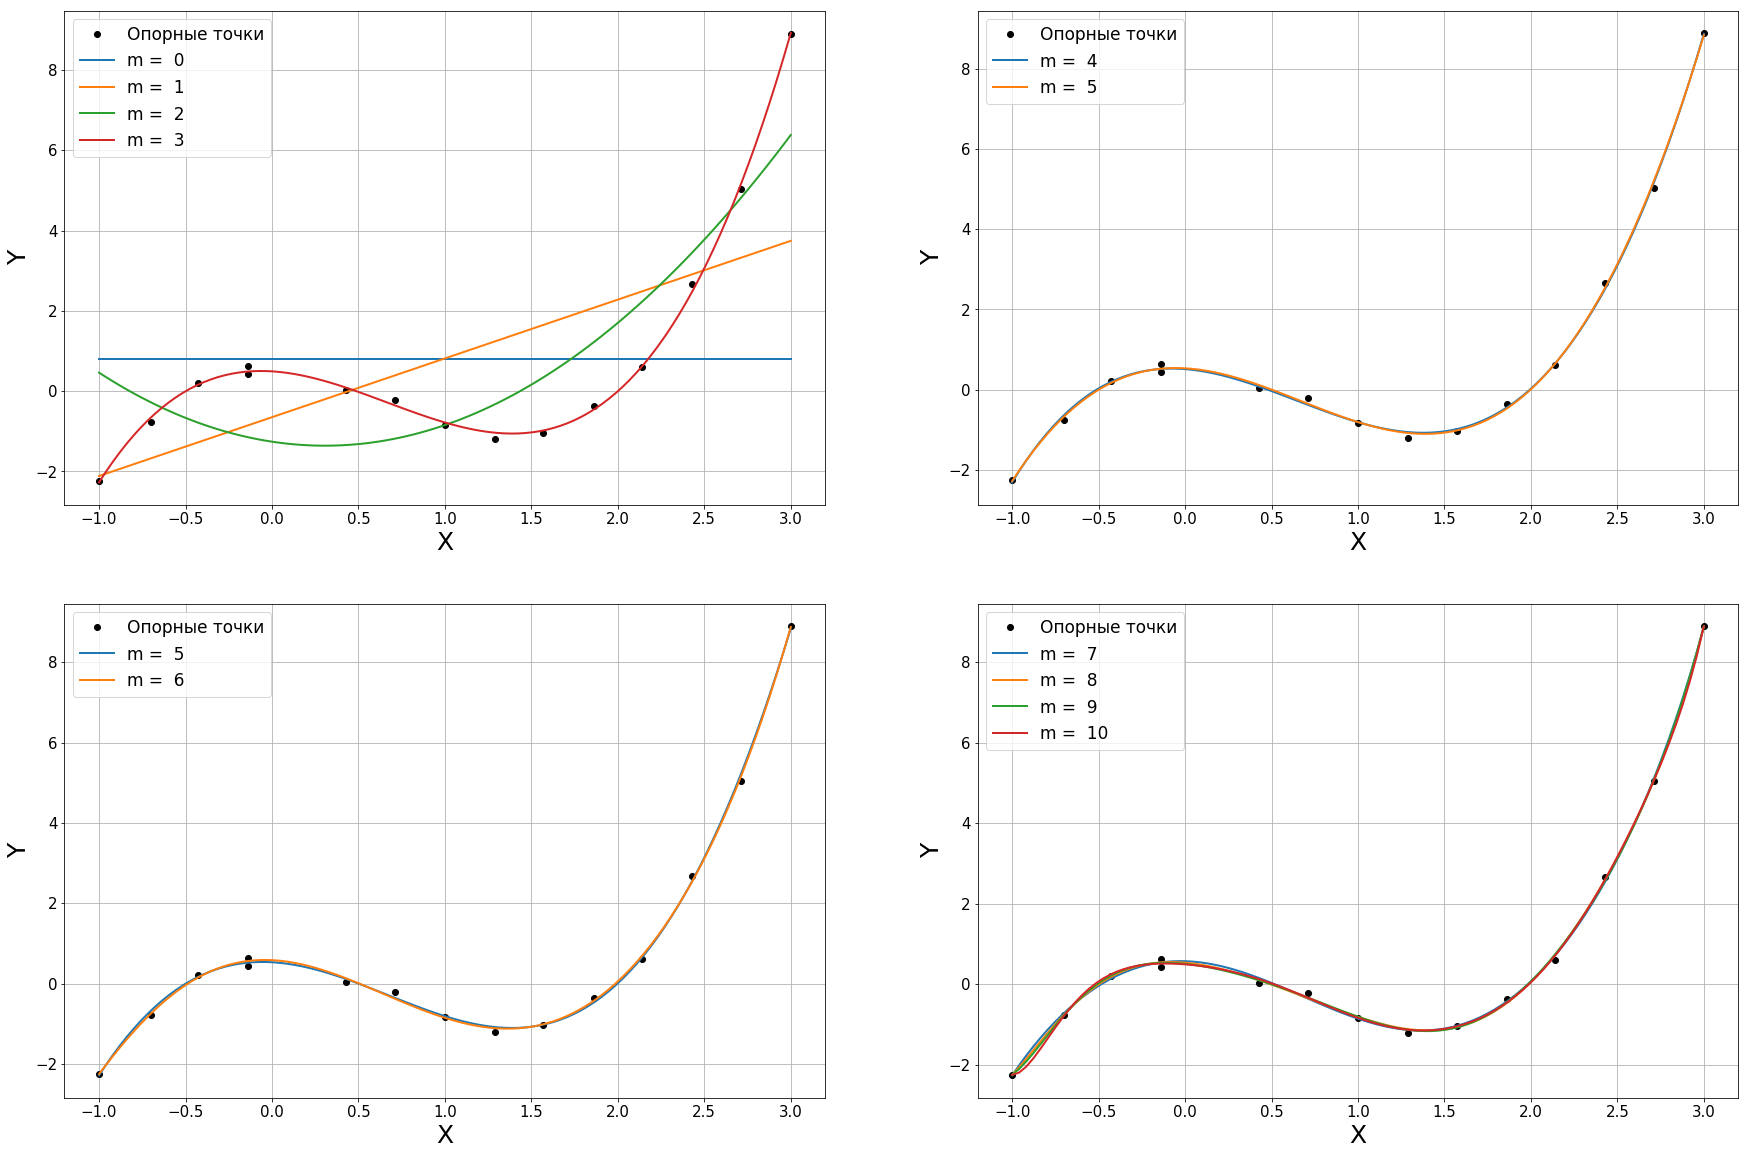

In [28]:
import matplotlib.ticker as ticker

x = np.array(x)

fig, ax = plt.subplots()

ax.plot(x, y, 'o', c='red',  label='Опорные точки')
# Точки для построения полиномов

x0 = np.linspace(np.min(x),np.max(x) , 100)
y0 = np.polyval(design(x,0)[::-1], x0 )
ax.plot(x0, y0, linewidth =2, label='m =  0')

y1 = np.polyval(design(x,1)[::-1], x0 )
ax.plot(x0, y1, linewidth =2, label='m =  1')

y2 = np.polyval(design(x,2)[::-1], x0 )
ax.plot(x0, y2, linewidth =2, label='m =  2')

y3 = np.polyval(design(x,3)[::-1], x0 )
ax.plot(x0, y3, linewidth =2, label='m =  3')

y4 = np.polyval(design(x,4)[::-1], x0 )
ax.plot(x0, y4, linewidth =2, label='m =  4')

y5 = np.polyval(design(x,5)[::-1], x0 )
ax.plot(x0, y5, linewidth =2, label='m =  5')

y6 = np.polyval(design(x,6)[::-1], x0 )
ax.plot(x0, y6, linewidth =2, label='m =  6')

y7 = np.polyval(design(x,7)[::-1], x0 )
ax.plot(x0, y7, linewidth =2, label='m =  7')

y8 = np.polyval(design(x,8)[::-1], x0 )
ax.plot(x0, y8, linewidth =2, label='m =  8')

y9 = np.polyval(design(x,9)[::-1], x0 )
ax.plot(x0, y9, linewidth =2, label='m =  9')

y10 = np.polyval(design(x,10)[::-1], x0 )
ax.plot(x0, y10, linewidth =2, label='m =  10')



ax.tick_params(axis='both', which ='major', labelsize =19)

ax.grid(which ='major', color ='k',linestyle ='-' )
ax.minorticks_on()
ax.grid(which ='minor', color ='grey', linestyle =':')
fig.set_figwidth(20)
fig.set_figheight(20)

plt.xlabel('X', fontsize= 35)
plt.ylabel('Y', fontsize= 35)

plt.legend(fontsize = 20)
plt.suptitle('Приближающие полиномы степеней 0 - 10', fontsize = 20)


plt.figure(figsize=(30, 20))



plt.subplot(221) 
plt.plot(x, y, 'o', c ='k' ,label='Опорные точки')
plt.plot(x0, y0, linewidth =2, label='m =  0')
plt.plot(x0, y1, linewidth =2, label='m =  1')
plt.plot(x0, y2, linewidth =2, label='m =  2')
plt.plot(x0, y3, linewidth =2, label='m =  3')
plt.xlabel('X', fontsize= 25)
plt.ylabel('Y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

plt.subplot(222) 
plt.plot(x, y, 'o', c ='k' ,label='Опорные точки')
plt.plot(x0, y4, linewidth =2, label='m =  4')
plt.plot(x0, y5, linewidth =2, label='m =  5')
plt.xlabel('X', fontsize= 25)
plt.ylabel('Y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

plt.subplot(223) 
plt.plot(x, y, 'o', c ='k' , label='Опорные точки')
plt.plot(x0, y5, linewidth =2, label='m =  5')
plt.plot(x0, y6, linewidth =2, label='m =  6')
plt.xlabel('X', fontsize= 25)
plt.ylabel('Y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

plt.subplot(224) 
plt.plot(x, y, 'o', c ='k' , label='Опорные точки')
plt.plot(x0, y7, linewidth =2, label='m =  7')
plt.plot(x0, y8, linewidth =2, label='m =  8')
plt.plot(x0, y9, linewidth =2, label='m =  9')
plt.plot(x0, y10, linewidth =2, label='m =  10')
plt.xlabel('X', fontsize= 25)
plt.ylabel('Y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()


Определённое  графически оптимальное значение m совпадает с рассчитанным ранее.

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [29]:
# Сначала создадим матрицу А. Функция для этой цели уже имеется...Вспомним её:

def design_matrix(x, m):
    A = np.zeros((len(x), m+1)) # Заготовка для матрицы
    for i in range(np.shape(A)[0]):
        for j in range(np.shape(A)[1]):
            A[i][j] =(x[i])**(j)
    return(A)

A = design_matrix(x, 4)
# Произведём QR-разложение матрицы А:
Q, R = np.linalg.qr(A, mode = 'complete')
R1 = R[:5]
f = (Q.T @ y)[:5]
betta_new = np.linalg.solve(R1, f)
print('Сравним с результатом из части 1, норма вектора разности:')
print(np.linalg.norm(design(x,4) - betta_new))


Сравним с результатом из части 1, норма вектора разности:
2.0460605844719524e-13


Таким образом, результат совпадает с результатом решения системы уравнений из первой части задания.

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

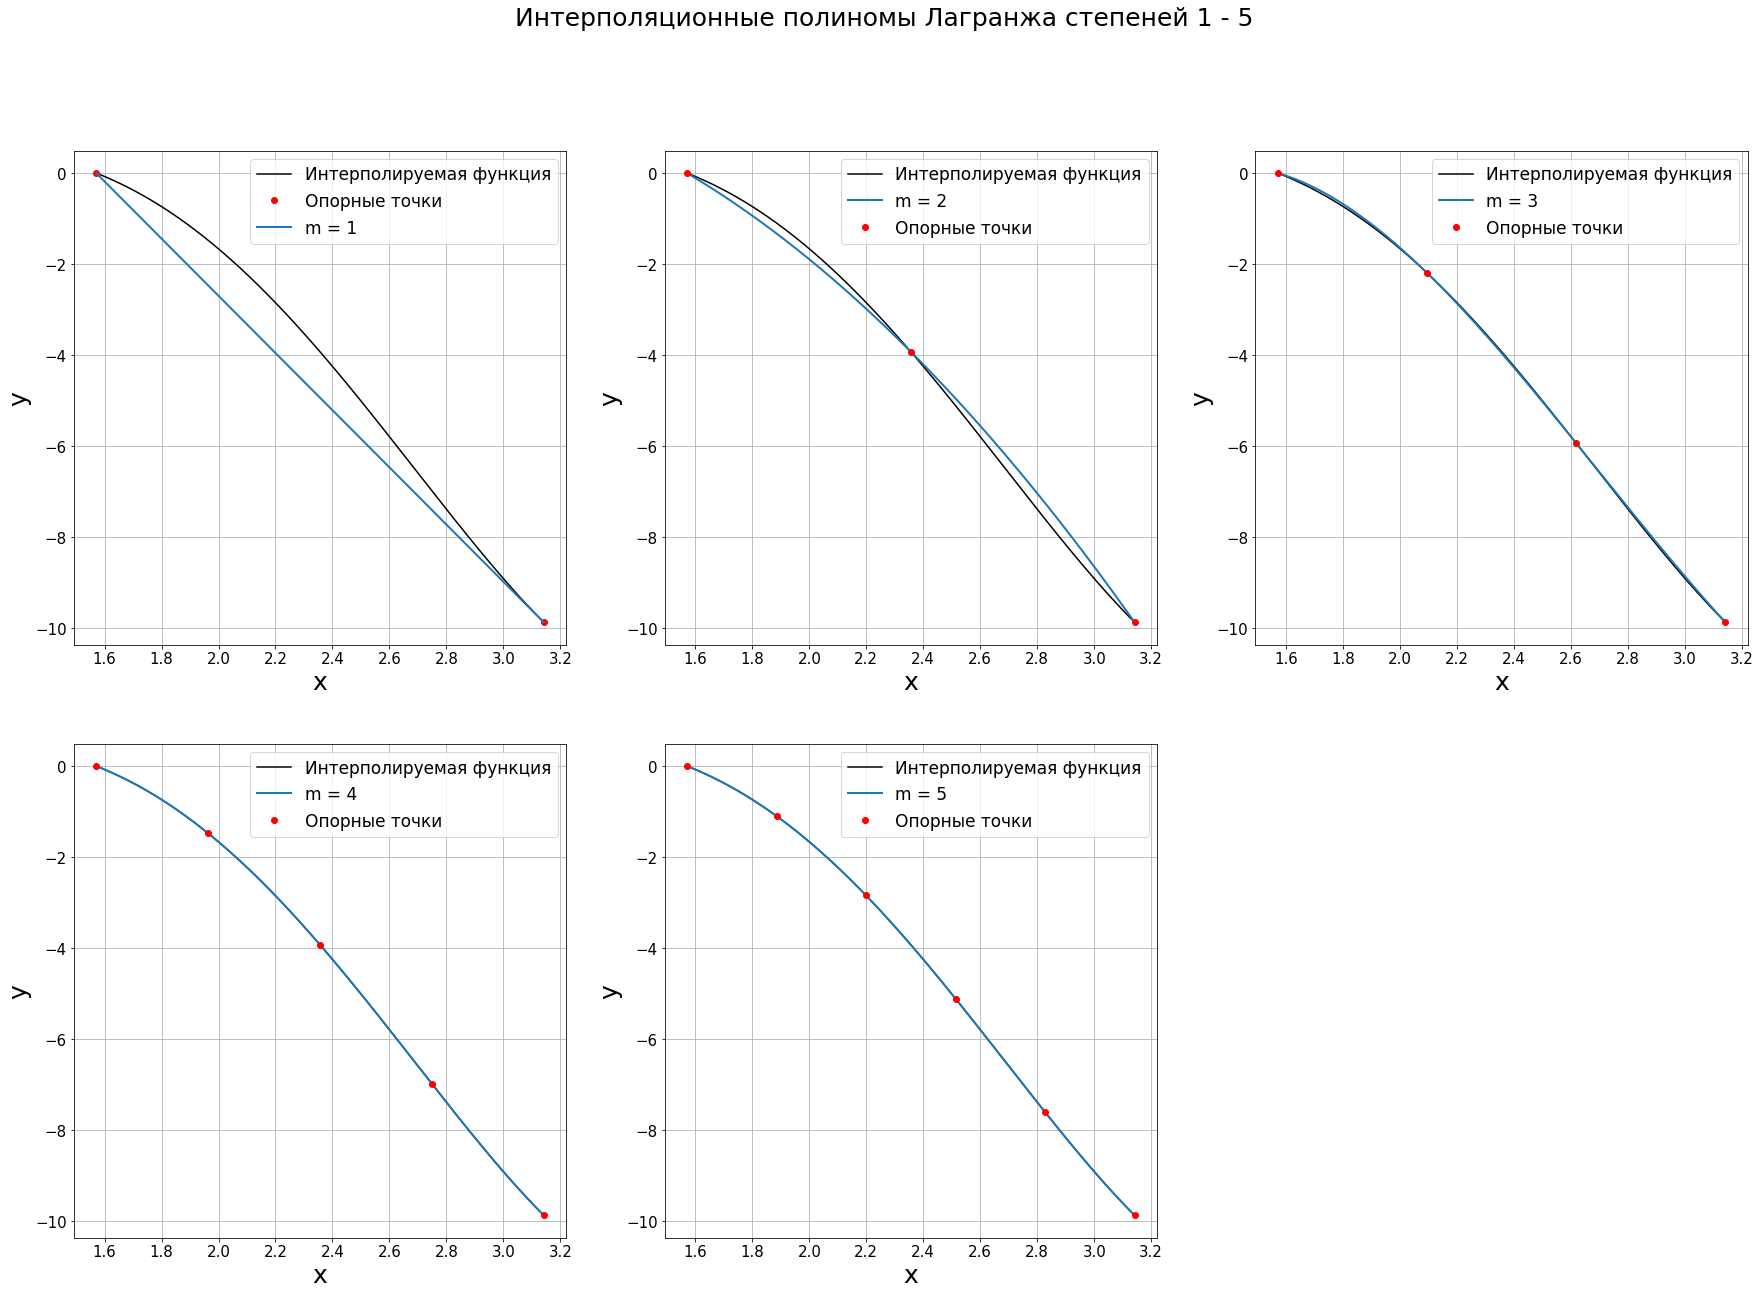

In [30]:
# Сначала сделаем элементарные полиномы Лагранжа
def l_k(X, k, m, x): # То есть ищем значение этого полинома в произвольной точке x
    l = 1
    for i in range(m+1):
        if i != k:
            l *= (x - X[i])/(X[k]-X[i])
    return(l)

def  Lagrange_ip(X, Y, m, x): # Интерполяционный многочлен Лагранжа степени m. Теперь можем использовать элементарные полиномы
    L = 0
    for i in range(m+1):
        L += Y[i]*l_k(X, i, m, x)
    return(L)


# Теперь перейдём к интерполяции заданной функции
import matplotlib.pyplot as plt

x0 = np.linspace(np.pi/2, np.pi, 1000) 
z = np.cos(x0)*x0**2
plt.figure(figsize=(30, 20))
plt.suptitle('Интерполяционные полиномы Лагранжа степеней 1 - 5', fontsize = 25)



x = np.linspace(np.pi/2, np.pi, 2)   # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
L1 = Lagrange_ip(x, y, 1, x0)
plt.subplot(231) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x, y,'o', c ='r' ,label='Опорные точки')
plt.plot(x0, L1, linewidth =2, label='m = 1')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = np.linspace(np.pi/2, np.pi, 3)   # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
L2 = Lagrange_ip(x, y, 2, x0)
plt.subplot(232) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L2, linewidth =2, label='m = 2')
plt.plot(x, y,'o', c ='r' ,label='Опорные точки')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = np.linspace(np.pi/2, np.pi, 4)   # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
L3 = Lagrange_ip(x, y, 3, x0)
plt.subplot(233) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L3, linewidth =2, label='m = 3')
plt.plot(x, y,'o', c ='r' ,label='Опорные точки')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = np.linspace(np.pi/2, np.pi, 5)   # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
L4 = Lagrange_ip(x, y, 4, x0)
plt.subplot(234) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L4, linewidth =2, label='m = 4')
plt.plot(x, y,'o', c ='r' ,label='Опорные точки')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = np.linspace(np.pi/2, np.pi, 6)   # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
L5 = Lagrange_ip(x, y, 5, x0)
plt.subplot(235) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L5, linewidth =2, label='m = 5')
plt.plot(x, y,'o', c ='r' ,label='Опорные точки')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()



### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

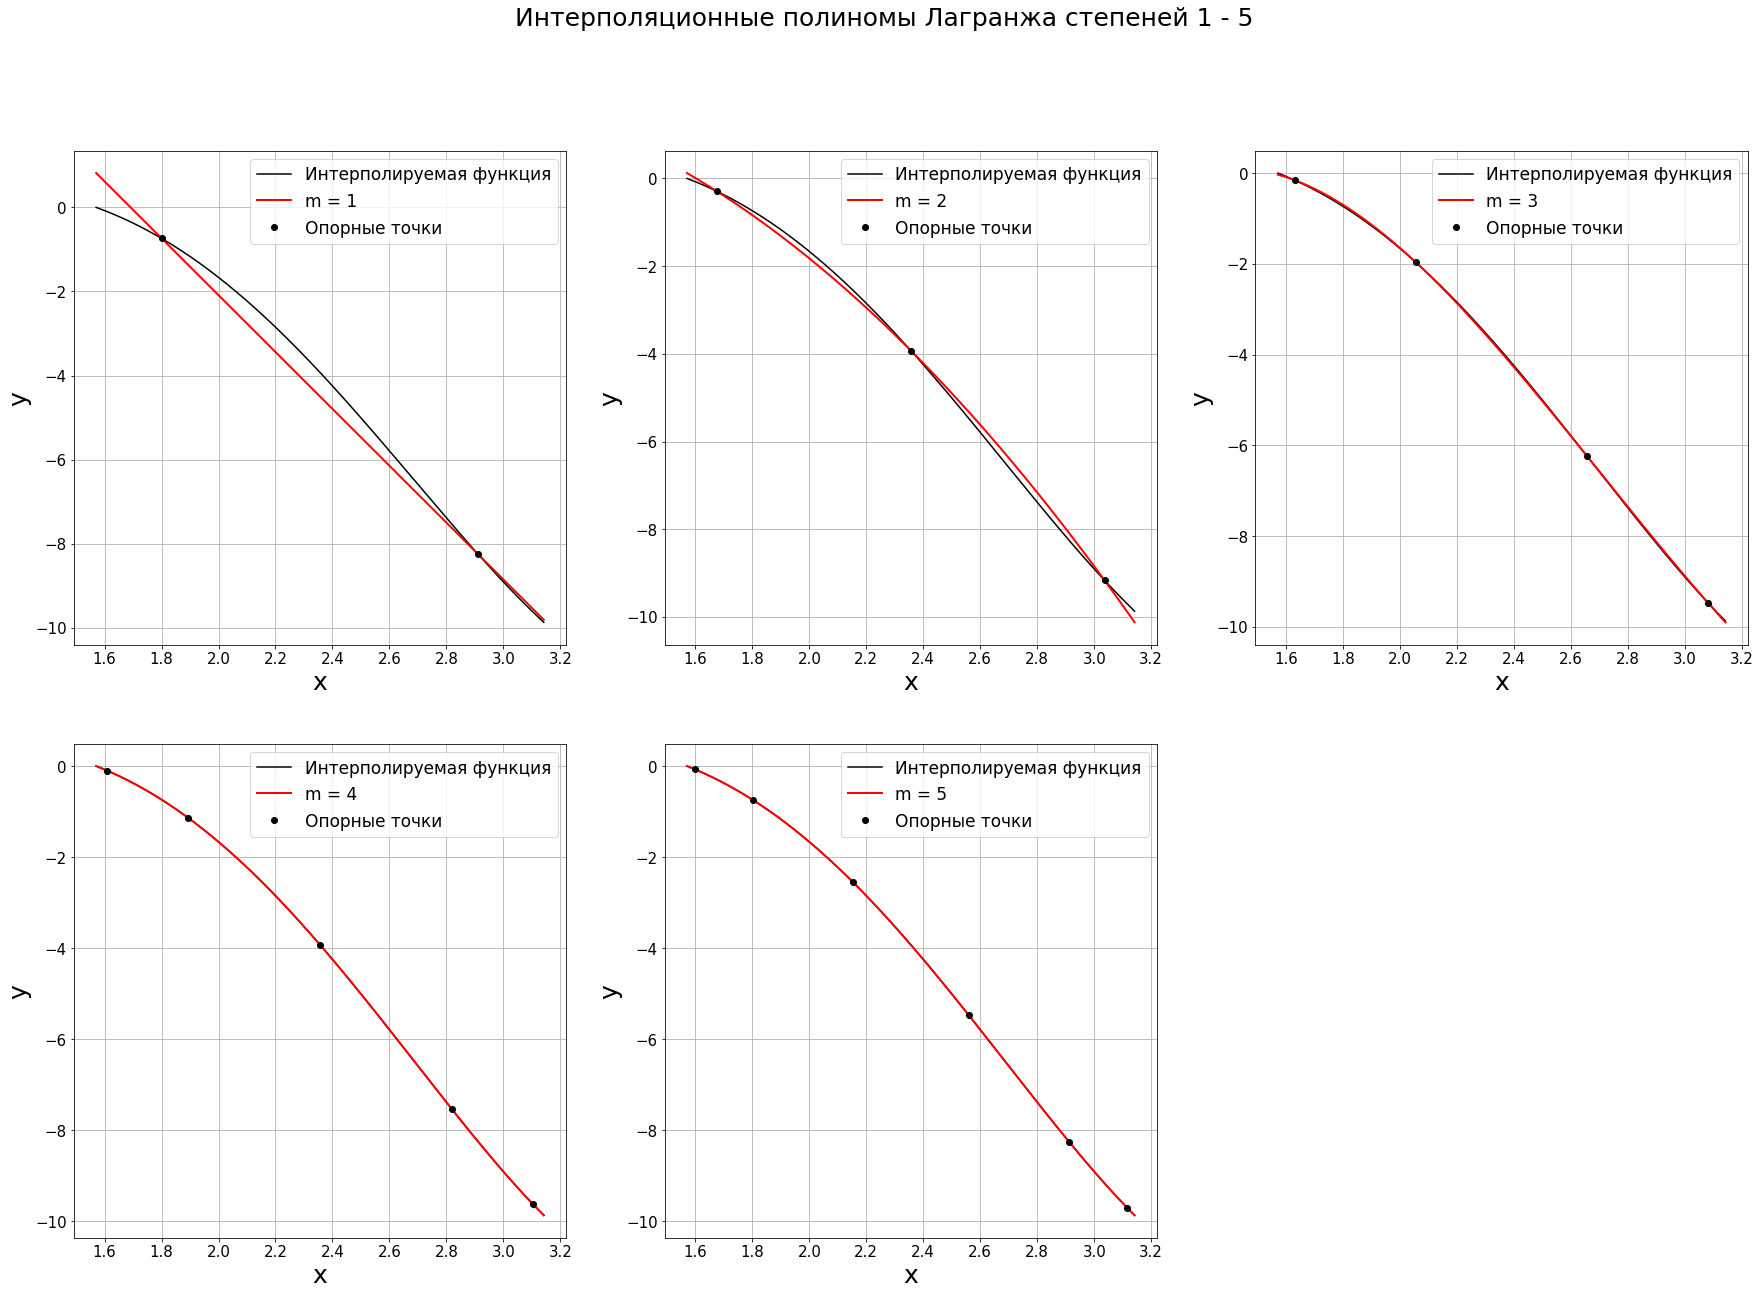

In [31]:
# Сначала научимся получать сетку из узлов Чебышева
def cheb_nodes(n):
    s = []
    for i in range(n):
        s0 = np.cos((2*i + 1)*np.pi/(2*n))
        s.append(s0)
        
    s = np.array(s)
    return(s)

# Но нам нужны узлы не на отрезке от -1 до 1, а на отредке [pi/2, pi], поэтому сетку нужно растянуть и сместить 
                                                                            # в центр отрезка заданного отрезка

def setka(n):
    s = []
    for i in range(n):
        s0 = (3*np.pi/2)/2 + (np.pi/2)/2*np.cos((2*i + 1)*np.pi/(2*n)) # pi/2 + pi = 3pi/2
        s.append(s0)                                                   # pi - pi/2 = pi/2
        
    s = np.array(s)
    return(s)

# Отлично, а теперь всё сначала...
# Теперь перейдём к интерполяции заданной функции
import matplotlib.pyplot as plt

x0 = np.linspace(np.pi/2, np.pi, 1000) 
z = np.cos(x0)*x0**2

plt.figure(figsize=(30, 20))
plt.suptitle('Интерполяционные полиномы Лагранжа степеней 1 - 5', fontsize = 25)

x = setka(2) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2

L1 = Lagrange_ip(x, y, 1, x0)
plt.subplot(231) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L1,c ='r' , linewidth =2, label='m = 1')
plt.plot(x, y,'o', c ='k' , linewidth =2, label='Опорные точки')


plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = setka(3) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2

L2 = Lagrange_ip(x, y, 2, x0)

plt.subplot(232) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L2, c ='r' ,linewidth =2, label='m = 2')
plt.plot(x, y,'o', c ='k' , linewidth =2, label='Опорные точки')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = setka(4) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2

L3 = Lagrange_ip(x, y, 3, x0)

plt.subplot(233) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L3, c ='r' ,linewidth =2, label='m = 3')
plt.plot(x, y,'o', c ='k' , linewidth =2, label='Опорные точки')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = setka(5) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
L4 = Lagrange_ip(x, y, 4, x0)


plt.subplot(234) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L4,c ='r' , linewidth =2, label='m = 4')
plt.plot(x, y,'o', c ='k' , linewidth =2, label='Опорные точки')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = setka(6) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
L5 = Lagrange_ip(x, y, 5, x0)


plt.subplot(235) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L5,c ='r' , linewidth =2, label='m = 5')
plt.plot(x, y,'o', c ='k' , linewidth =2, label='Опорные точки')

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()


Мне трудно сравнить результаты двух способов интерполяции, поэтому я совмещу графики.

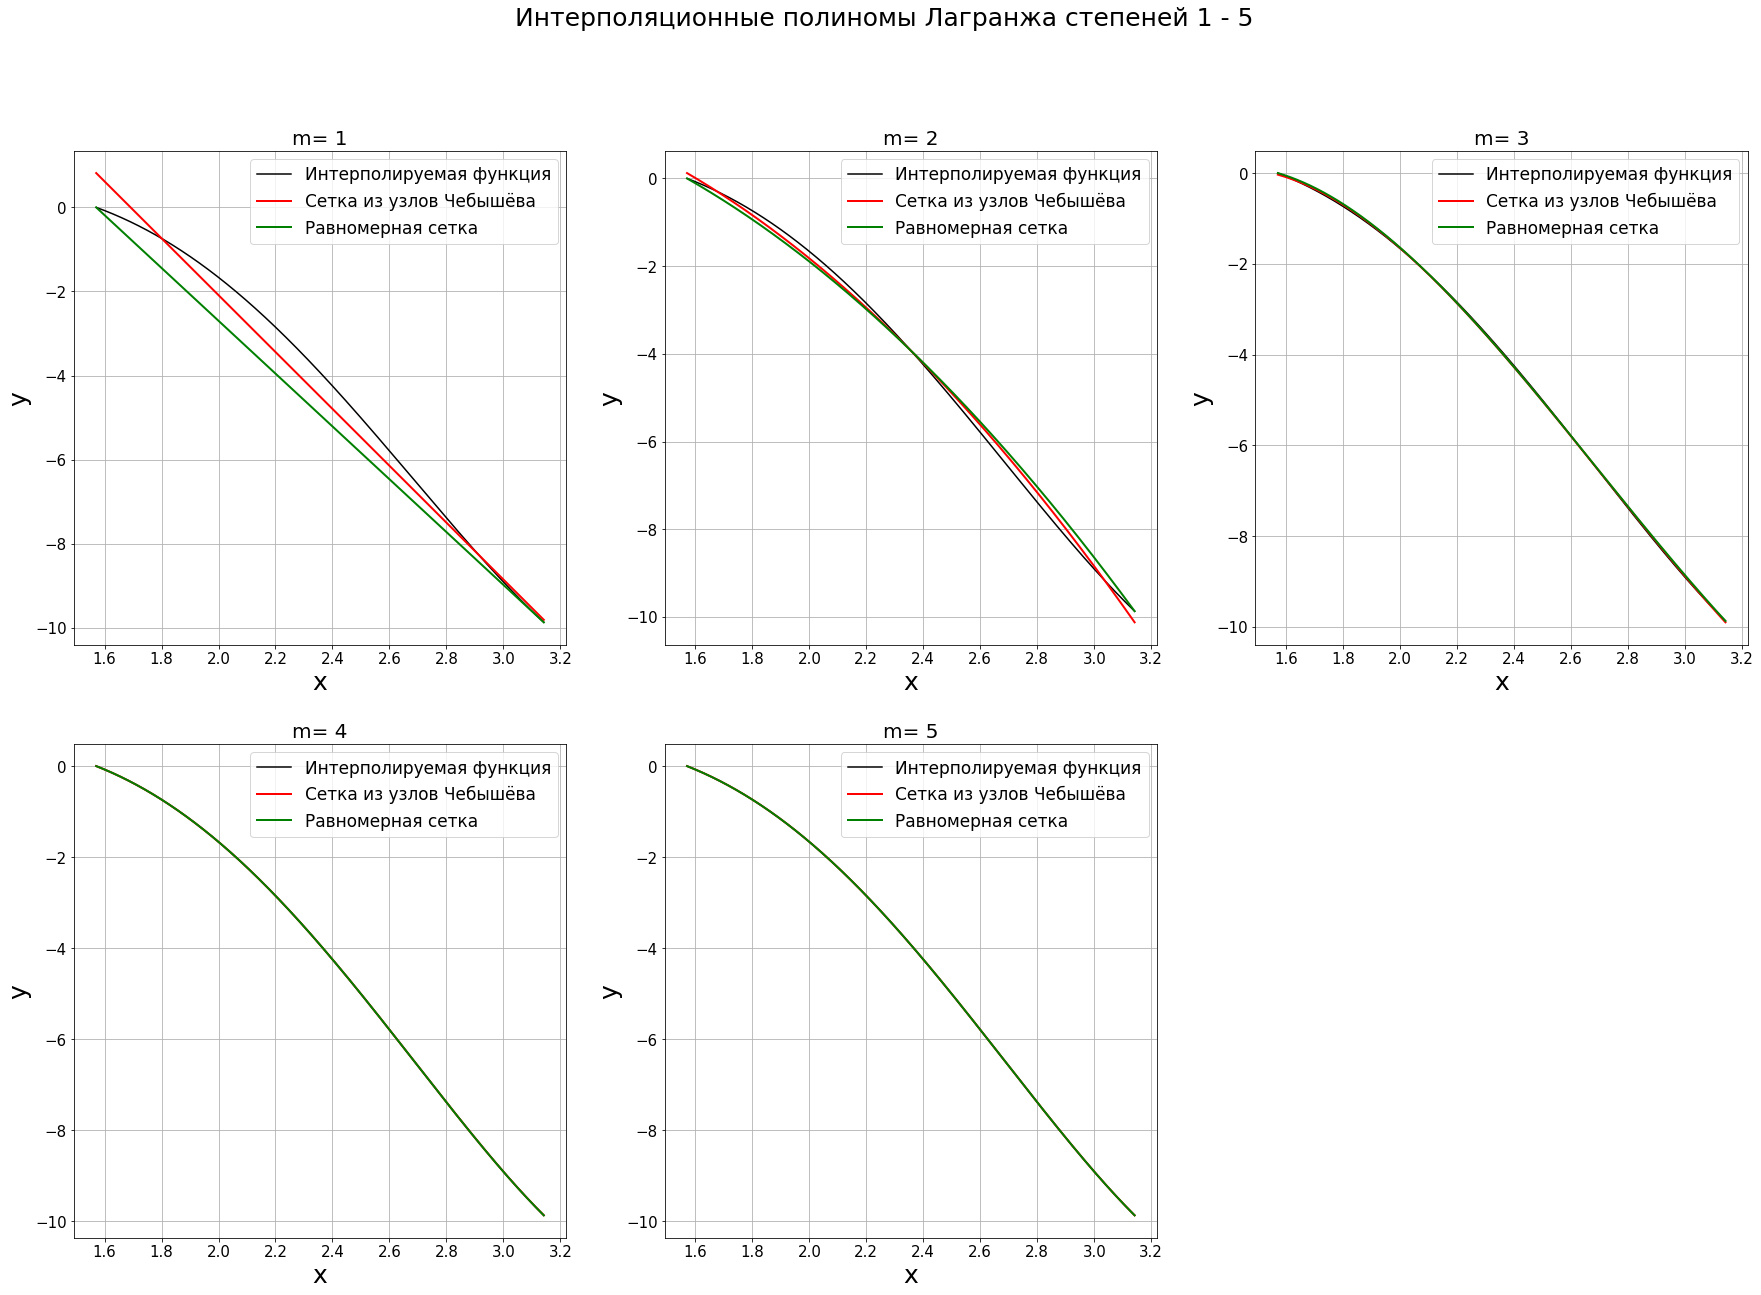

In [32]:
# Сначала научимся получать сетку из узлов Чебышева
def cheb_nodes(n):
    s = []
    for i in range(n):
        s0 = np.cos((2*i + 1)*np.pi/(2*n))
        s.append(s0)
        
    s = np.array(s)
    return(s)

# Но нам нужны узлы не на отрезке от -1 до 1, а на отредке [pi/2, pi], поэтому сетку нужно растянуть и сместить 
                                                                            # в центр отрезка заданного отрезка

def setka(n):
    s = []
    for i in range(n):
        s0 = (3*np.pi/2)/2 + (np.pi/2)/2*np.cos((2*i + 1)*np.pi/(2*n)) # pi/2 + pi = 3pi/2
        s.append(s0)                                                   # pi - pi/2 = pi/2
        
    s = np.array(s)
    return(s)

# Отлично, а теперь всё сначала...
# Теперь перейдём к интерполяции заданной функции
import matplotlib.pyplot as plt

x0 = np.linspace(np.pi/2, np.pi, 1000) 
z = np.cos(x0)*x0**2

plt.figure(figsize=(30, 20))
plt.suptitle('Интерполяционные полиномы Лагранжа степеней 1 - 5', fontsize = 25)

x = setka(2) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2

xu = np.linspace(np.pi/2, np.pi, 2)   # Опорные точки для полинома Лагранжа
yu = np.cos(xu)*xu**2
L1u = Lagrange_ip(xu, yu, 1, x0)
L1 = Lagrange_ip(x, y, 1, x0)
plt.subplot(231) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L1,c ='r' , linewidth =2, label='Cетка из узлов Чебышёва')
plt.plot(x0, L1u, c ='g' , linewidth =2, label='Равномерная сетка')
plt.title('m= 1', fontsize =20)

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = setka(3) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2

xu = np.linspace(np.pi/2, np.pi, 3)   # Опорные точки для полинома Лагранжа
yu = np.cos(xu)*xu**2
L2u = Lagrange_ip(xu, yu, 2, x0)
L2 = Lagrange_ip(x, y, 2, x0)

plt.subplot(232) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L2, c ='r' ,linewidth =2, label='Cетка из узлов Чебышёва')
plt.plot(x0, L2u, c ='g' ,linewidth =2, label='Равномерная сетка')
plt.title('m= 2', fontsize =20)

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = setka(4) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2

xu = np.linspace(np.pi/2, np.pi, 4)   # Опорные точки для полинома Лагранжа
yu = np.cos(xu)*xu**2
L3u = Lagrange_ip(xu, yu, 3, x0)
L3 = Lagrange_ip(x, y, 3, x0)

plt.subplot(233) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L3, c ='r' ,linewidth =2, label='Cетка из узлов Чебышёва')
plt.plot(x0, L3u, c ='g' ,linewidth =2, label='Равномерная сетка')
plt.title('m= 3', fontsize =20)

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = setka(5) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
xu = np.linspace(np.pi/2, np.pi, 5)   # Опорные точки для полинома Лагранжа
yu = np.cos(xu)*xu**2
L4u = Lagrange_ip(xu, yu, 4, x0)
L4 = Lagrange_ip(x, y, 4, x0)


plt.subplot(234) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L4,c ='r' , linewidth =2, label='Cетка из узлов Чебышёва')
plt.plot(x0, L4u, c ='g' ,linewidth =2, label='Равномерная сетка')
plt.title('m= 4', fontsize =20)

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()

x = setka(6) # Опорные точки для полинома Лагранжа
y = np.cos(x)*x**2
xu = np.linspace(np.pi/2, np.pi, 6)   # Опорные точки для полинома Лагранжа
yu = np.cos(xu)*xu**2
L5u = Lagrange_ip(xu, yu, 5, x0)
L5 = Lagrange_ip(x, y, 5, x0)


plt.subplot(235) 
plt.plot(x0, z, c ='k' ,label='Интерполируемая функция')
plt.plot(x0, L5,c ='r' , linewidth =2, label='Cетка из узлов Чебышёва')
plt.plot(x0, L5u, c ='g' ,linewidth =2, label='Равномерная сетка')
plt.title('m= 5', fontsize =20)

plt.xlabel('x', fontsize= 25)
plt.ylabel('y', fontsize= 25)
plt.legend(fontsize= 17)
plt.xticks( fontsize= 15)
plt.yticks( fontsize= 15)
plt.grid()


Интерполяция с использованием узлов Чебышёва происходит точнее, однако заметно только при небольшом кол-ве узлов.